# DeepTweets

## Introduction:
DeepTweets is a data science project focused on the classification of tweets into two categories: Politics and Sports. The project aims to develop a machine learning model that can accurately predict the category of a given tweet, enabling effective categorization and analysis of Twitter data.

## Exploratory Data Analysis
Before building the model, it is essential to perform exploratory data analysis (EDA) to gain insights into the dataset and answer key questions. Some of the important questions to consider during the analysis phase of the DeepTweets project include:

Data Overview:

- How many tweets are available in the dataset?
- What are the features (columns) present in the dataset?
- What is the distribution of tweets across different categories (Politics and Sports)?
- Are there any missing values or inconsistencies in the data?

Text Analysis:

- What are the common words or phrases in the tweets?
- Are there any special characters, hashtags, or URLs in the tweets that need preprocessing?

Class Imbalance:

- Is there a significant class imbalance between Politics and Sports tweets?
- If there is a class imbalance, how can we address it to ensure balanced model training?

Visualization:

- Can we visualize the distribution of tweet lengths, word frequencies, or other relevant statistics?
- Are there any visual patterns or trends that can be identified from the data?...

In [148]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [149]:
# load data
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

### Explore data

In [3]:
df_train.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


In [4]:
df_train.shape

(6525, 3)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525 entries, 0 to 6524
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetId    6525 non-null   int64 
 1   Label      6525 non-null   object
 2   TweetText  6525 non-null   object
dtypes: int64(1), object(2)
memory usage: 153.1+ KB


In [6]:
# check for missing values
df_train.isnull().sum()

TweetId      0
Label        0
TweetText    0
dtype: int64

In [7]:
# check for duplicates
df_train.duplicated().sum()

0

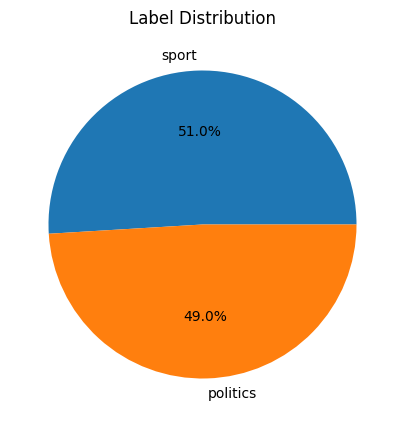

In [8]:
# visiualize the counts in a pie chart
plt.figure(figsize=(5, 5))
plt.pie(df_train['Label'].value_counts(), labels=['sport', 'politics'], autopct='%1.1f%%')
plt.title('Label Distribution')
plt.show()

The pie chart illustrates the label distribution in the training data. It shows that approximately 51.0% of the tweets are classified as 'Sports' while 49.0% are classified as 'Politics'. The distribution appears to be fairly balanced, indicating that the dataset contains a relatively equal number of tweets from both categories.

### Data preprocessing

Data preprocessing is a crucial step in our project as it prepares raw data for analysis and modeling. Techniques such as text cleaning, tokenization, removing stopwords, and lemmatization are applied to transform unstructured text into a structured and meaningful format. This process has multiple benefits. Firstly, it standardizes the text data by removing irrelevant information like HTML tags, URLs, and special characters. Secondly, it reduces data dimensionality by converting words to their base form and removing commonly occurring words, enhancing model efficiency and preventing overfitting. Additionally, data preprocessing enables exploratory data analysis, facilitating the generation of insightful visualizations like word clouds. The described preprocessing steps were adapted from the source : https://towardsdatascience.com/complete-guide-to-perform-classification-of-tweets-with-spacy-e550ee92ca79.

In [150]:
# import tweet_cleaner function from utils.py
from utils import clean_tweets

In [151]:
# apply the function to the tweet text
df_train['clean_text'] = df_train['TweetText'].apply(clean_tweets)

In [152]:
df_train.head()

,TweetId,Label,TweetText,clean_text
0,304271250237304833,Politics,"'#SecKerry: The value of the @StateDept and @USAID is measured, not in dollars, but in terms of our deepest American values.'",seckerry value statedept usaid measured dollar term deepest american value
1,304834304222064640,Politics,'@rraina1481 I fear so',rraina fear
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final between Australia and West Indies at http://t.co/lBXIIk3j',watch video highlight wwc final australia west indie
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPark ! #theymakeitlooksoeasy @ausgrandprix @ChadwickModels #CantWaitForAusGP',rt chelscanlan nitro circus albertpark theymakeitlooksoeasy ausgrandprix chadwickmodels cantwaitforausgp
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for the feedback :-)',cricketfox always good thing thanks feedback


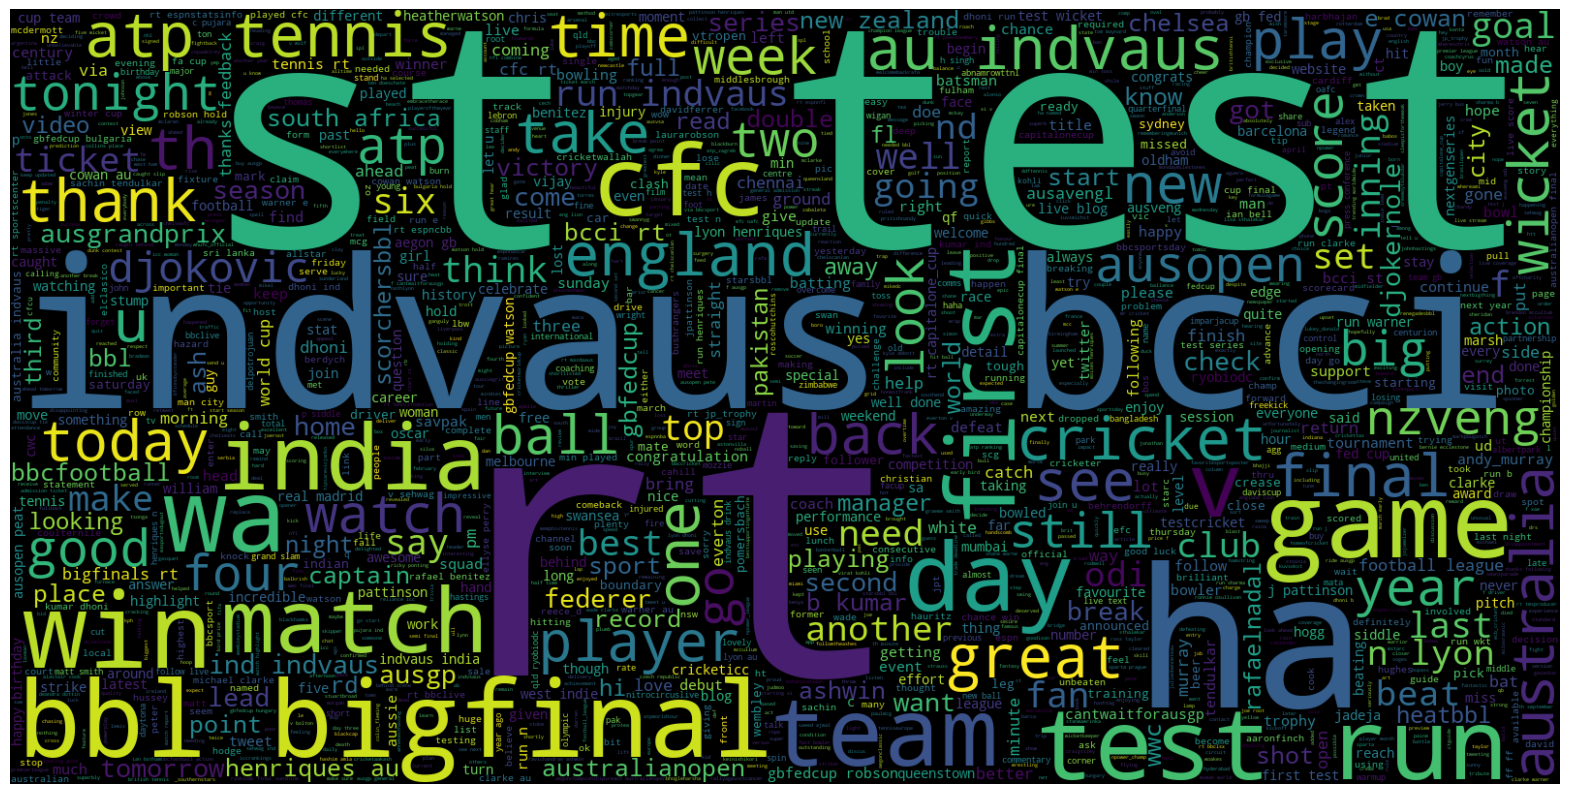

In [12]:
# visualize the most common words in the sport tweets
from wordcloud import WordCloud

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(df_train[df_train['Label'] == "Sports"]['clean_text']))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

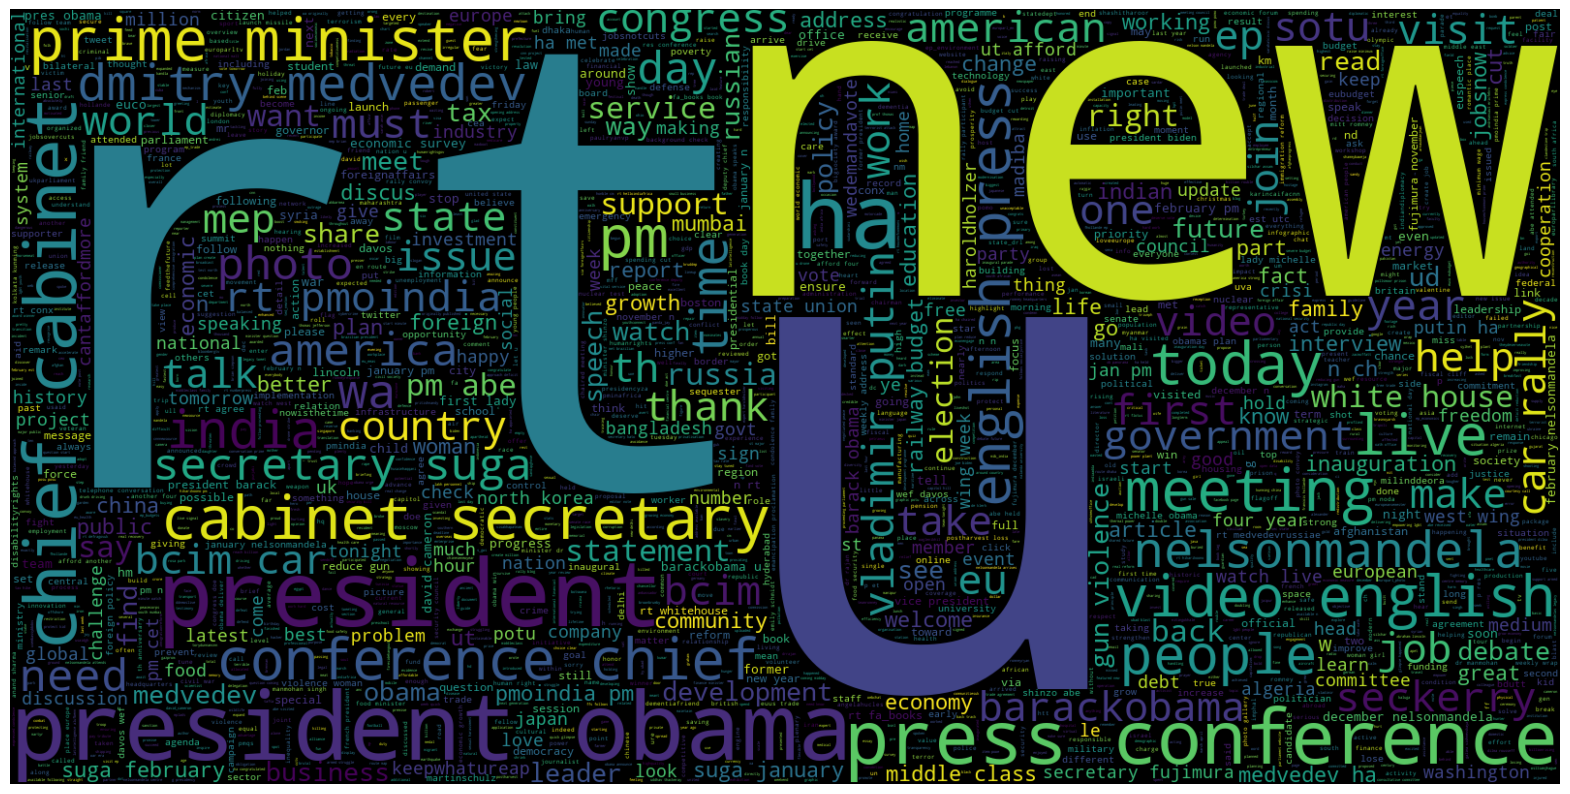

In [17]:
# visualize the most common words in the politics tweets
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(df_train[df_train['Label'] == "Politics"]['clean_text']))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [153]:
# import plot_top_n_words function from utils.py
from utils import plot_top_n_words

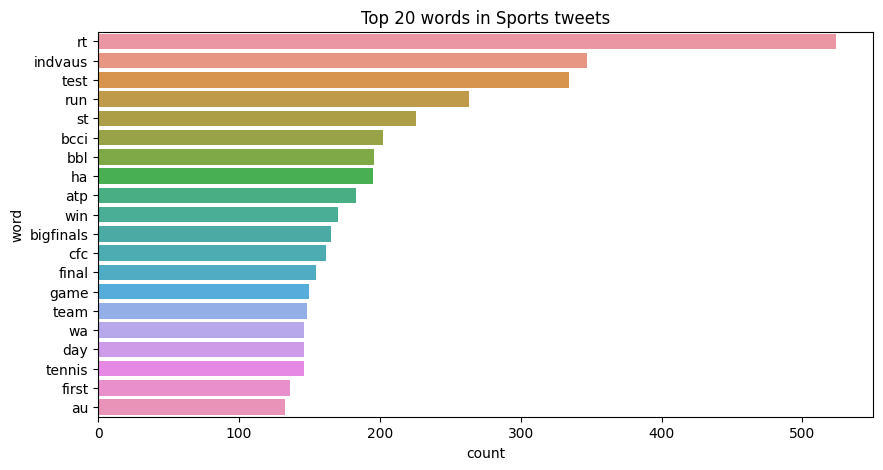

In [154]:
# displays the top 20 most frequent words in the "Sports" tweets
plot_top_n_words(df_train[df_train['Label'] == "Sports"]['clean_text'], 20, 'Top 20 words in Sports tweets')

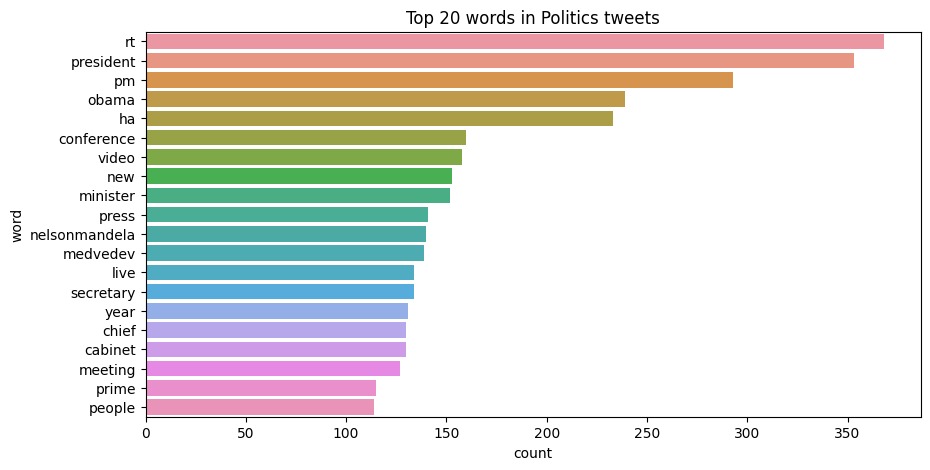

In [155]:
# displays the top 20 most frequent words in the "Politics" tweets
plot_top_n_words(df_train[df_train['Label'] == "Politics"]['clean_text'], 20, 'Top 20 words in Politics tweets')

The plots clearly demonstrate a noticeable difference in the words used in tweets related to different topics. In the "Sports" tweets, common words include sports-specific terms, player names, and game-related terms. On the other hand, the "Politics" tweets contain words related to political events, government, and policy discussions. This distinction in word usage highlights the contrasting nature of the two topics and confirms that the feature extraction process effectively captures the essence of each category.

C:\Users\ADS\AppData\Local\Temp\ipykernel_4080\1152370273.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[df_train['Label'] == "Sports"]['length'], label='Sports')
C:\Users\ADS\AppData\Local\Temp\ipykernel_4080\1152370273.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[

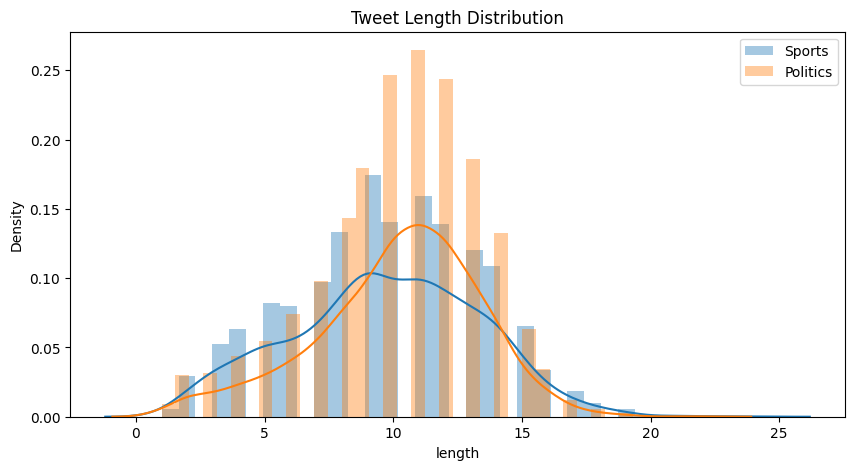

In [156]:
# check the length of the tweets
df_train['length'] = df_train['clean_text'].apply(lambda x: len(x.split()))

df_train.head()

# visualize the length of the tweets
plt.figure(figsize=(10, 5))
sns.distplot(df_train[df_train['Label'] == "Sports"]['length'], label='Sports')
sns.distplot(df_train[df_train['Label'] == "Politics"]['length'], label='Politics')
plt.legend()
plt.title('Tweet Length Distribution')
plt.show()

In [157]:
# check the maximum length of the sports tweets 
df_train[df_train['Label'] == "Sports"]['length'].describe()


count    3325.000000
mean        9.713985
std         3.696805
min         1.000000
25%         7.000000
50%        10.000000
75%        12.000000
max        24.000000
Name: length, dtype: float64

In [158]:
# check the maximum length of the Politics tweets 
df_train[df_train['Label'] == "Politics"]['length'].describe()

count    3200.000000
mean       10.212813
std         3.204701
min         1.000000
25%         8.000000
50%        11.000000
75%        12.000000
max        22.000000
Name: length, dtype: float64

In our analysis, we are investigating the relationship between tweet length and category in order to gain insights into the characteristics of tweets in the "Sports" and "Politics" categories. Based on these statistics, we can observe that the average tweet length for "Politics" tweets is marginally higher compared to "Sports" tweets. However, it is important to note that these findings are derived from a preliminary analysis, and further investigation and visualization techniques may be necessary to validate and deepen our understanding of the relationship between tweet length and category.

### Feature Extraction + Model Training

##### Feature Extraction:

In the context of the DeepTweets project, feature extraction refers to the process of converting raw text data (tweets) into numerical representations that can be used as input to machine learning models. Feature extraction is a crucial step in text classification tasks, as it transforms the text data into a format that can be understood and processed by the models.

Feature extraction techniques commonly used in text classification tasks include:

- CountVectorizer: This technique converts text documents into a matrix of token counts, where each row represents a document, and each column represents a unique word in the corpus. The cell values represent the frequency of each word in the corresponding document.

- TF-IDF (Term Frequency-Inverse Document Frequency): TF-IDF calculates the importance of a word in a document relative to the entire corpus. It considers both the frequency of the word in the document (term frequency) and its rarity across the entire corpus (inverse document frequency). TF-IDF assigns higher weights to words that are more relevant to a specific document.

##### Models:

For the DeepTweets project, we will work with the following models for tweet classification:

- Logistic Regression: Logistic Regression is a linear classification algorithm that models the relationship between the input features and the probability of belonging to a specific class. It is commonly used for binary classification tasks and can be extended to handle multi-class classification. Logistic Regression is interpretable, computationally efficient, and works well with high-dimensional data.

- Multinomial Naive Bayes (MNB): Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem. MNB is suitable for text classification tasks and assumes that the features (words in our case) are conditionally independent. It works well with sparse data and is computationally efficient.

- Ridge Classifier: Ridge Classifier is a linear classifier that uses ridge regression to handle multi-class classification problems. It is often used for text classification tasks and performs well with high-dimensional data.

- Random Forest Classifier: Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It is known for its ability to handle complex relationships in data and can be effective for text classification tasks.

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier, Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV
import time

In [19]:
# Classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    'RidgeClassifier': RidgeClassifier(),
    'AdaBoost': AdaBoostClassifier(n_estimators=100),
    'MNB': MultinomialNB(),
    'Perceptron': Perceptron(),       
}

In [160]:
X_train, X_valid, y_train, y_valid = train_test_split(df_train['clean_text'], df_train['Label'], test_size=0.2, random_state=42)

In [161]:
def train_models(X_train, y_train, X_valid, y_valid):
    # TF-IDF feature extraction
    tfidf_vectorizer = TfidfVectorizer()
    X_tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    X_tfidf_valid = tfidf_vectorizer.transform(X_valid)

    # CountVectorizer feature extraction
    count_vectorizer = CountVectorizer()
    X_count_train = count_vectorizer.fit_transform(X_train)
    X_count_valid = count_vectorizer.transform(X_valid)

    # Initialize a list to store the model results
    results = []

    # Train the models with TF-IDF
    for clf_name, clf in classifiers.items():
        start_time = time.time()
        clf.fit(X_tfidf_train, y_train)
        y_pred = clf.predict(X_tfidf_valid)
        accuracy = accuracy_score(y_valid, y_pred)
        precision = precision_score(y_valid, y_pred, pos_label='Sports')  # Calculate precision for 'Sports' category
        recall = recall_score(y_valid, y_pred, pos_label='Sports')  # Calculate recall for 'Sports' category
        execution_time = time.time() - start_time
        results.append([clf_name, "TF-IDF", accuracy, precision, recall, execution_time])

    # Train the models with CountVectorizer
    for clf_name, clf in classifiers.items():
        start_time = time.time()
        clf.fit(X_count_train, y_train)
        y_pred = clf.predict(X_count_valid)
        accuracy = accuracy_score(y_valid, y_pred)
        precision = precision_score(y_valid, y_pred, pos_label='Sports')  # Calculate precision for 'Sports' category
        recall = recall_score(y_valid, y_pred, pos_label='Sports')  # Calculate recall for 'Sports' category
        execution_time = time.time() - start_time
        results.append([clf_name, "CountVectorizer", accuracy, precision, recall, execution_time])

    # Create a DataFrame with the results
    df_results = pd.DataFrame(results, columns=["Model", "Feature Extraction", "Accuracy", "Precision", "Recall", "Execution Time"])
    return df_results


In [162]:
results_df_imp = train_models(X_train, y_train, X_valid, y_valid)

In [163]:
# results_df_imp sorted by accuracy
results_df_imp.sort_values(by='Accuracy', ascending=False)

,Model,Feature Extraction,Accuracy,Precision,Recall,Execution Time
18,MNB,CountVectorizer,0.960153,0.954210,0.968516,0.018996
8,MNB,TF-IDF,0.957088,0.953938,0.962519,0.021000
3,Linear SVM,TF-IDF,0.951724,0.946746,0.959520,2.897188
0,Logistic Regression,TF-IDF,0.946360,0.943536,0.952024,0.211043
6,RidgeClassifier,TF-IDF,0.946360,0.946188,0.949025,0.037906
10,Logistic Regression,CountVectorizer,0.944061,0.934211,0.958021,0.132366
16,RidgeClassifier,CountVectorizer,0.942529,0.937870,0.950525,0.058933
13,Linear SVM,CountVectorizer,0.937931,0.913842,0.970015,2.524619
9,Perceptron,TF-IDF,0.933333,0.926471,0.944528,0.018000
2,k-Nearest Neighbors,TF-IDF,0.928736,0.923304,0.938531,0.207741


In [164]:
# hyperparameter tuning for MNB with count vectorizer
# count vectorizer feature extraction
count_vectorizer = CountVectorizer()
X_count_train = count_vectorizer.fit_transform(X_train)
X_count_valid = count_vectorizer.transform(X_valid)

# hyperparameter tuning
param_grid1 = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0], 'fit_prior': [True, False]}
clf1 = MultinomialNB()
grid1 = GridSearchCV(clf1, param_grid1, cv=5, scoring='accuracy')
grid1.fit(X_count_train, y_train)

# best hyperparameter
best_params1 = grid1.best_params_
best_score1 = grid1.best_score_

# predict the labels for the validation set
y_pred = grid1.predict(X_count_valid)

# accuracy score
accuracy_score(y_valid, y_pred)

0.9662835249042145

In [165]:
# apply the function to the tweet text
df_test['clean_text'] = df_test['TweetText'].apply(clean_tweets)

In [166]:
# predict the labels for the test set
X_test = df_test['clean_text']
X_count_test = count_vectorizer.transform(X_test)
y_pred = grid1.predict(X_count_test)

# create a submission file
submission_df1 = pd.DataFrame({'TweetID': df_test['TweetId'], 'Label': y_pred})

In [168]:
# hyperparameter tuning for logistic regression with tf-idf vectorizer
# tf-idf vectorizer feature extraction
tfidf_vectorizer = TfidfVectorizer()
X_tfidf_train = tfidf_vectorizer.fit_transform(X_train)
X_tfidf_valid = tfidf_vectorizer.transform(X_valid)

# hyperparameter tuning
param_grid2 = {'C': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0], 'penalty': ['l2']}
clf2 = LogisticRegression()
grid2 = GridSearchCV(clf2, param_grid2, cv=5, scoring='accuracy')
grid2.fit(X_tfidf_train, y_train)

# best hyperparameter
best_params2 = grid2.best_params_
best_score2 = grid2.best_score_

# predict the labels for the validation set
y_pred = grid2.predict(X_tfidf_valid)

# accuracy score
accuracy_score(y_valid, y_pred)


0.9524904214559387

In [169]:
# predict the labels for the test set
X_test = df_test['clean_text']
X_tfidf_test = tfidf_vectorizer.transform(X_test)
y_pred = grid2.predict(X_tfidf_test)

# create a submission file
submission_df2 = pd.DataFrame({'TweetID': df_test['TweetId'], 'Label': y_pred})

In [170]:
# hyperparameter tuning for ridge classifier with tf-idf vectorizer
# tf-idf vectorizer feature extraction
tfidf_vectorizer = TfidfVectorizer()
X_tfidf_train = tfidf_vectorizer.fit_transform(X_train)
X_tfidf_valid = tfidf_vectorizer.transform(X_valid)

# hyperparameter tuning
param_grid3 = {
    'alpha': [0.1, 1.0, 10.0],
    'solver': ['auto', 'cholesky', 'lsqr', 'sag', 'saga']
}
clf3 = RidgeClassifier()
grid3 = GridSearchCV(clf3, param_grid3, cv=5, scoring='accuracy')
grid3.fit(X_tfidf_train, y_train)

# best hyperparameter
best_params3 = grid3.best_params_
best_score3 = grid3.best_score_

# predict the labels for the validation set
y_pred = grid3.predict(X_tfidf_valid)

# accuracy score
accuracy_score(y_valid, y_pred)

c:\Users\ADS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ADS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ADS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1424, in fit
    super().fit(X, Y, sample_weight=sample_weight)
  File "c:\Users\ADS\AppData\Local\Programs\Python\Python311\Lib\site-pac

0.946360153256705

In [171]:
# predict the labels for the test set
X_test = df_test['clean_text']
X_tfidf_test = tfidf_vectorizer.transform(X_test)
y_pred = grid3.predict(X_tfidf_test)

# create a submission file
submission_df3 = pd.DataFrame({'TweetID': df_test['TweetId'], 'Label': y_pred})

In [172]:
submission_df3.head()

,TweetID,Label
0,306486520121012224,Sports
1,286353402605228032,Sports
2,289531046037438464,Politics
3,306451661403062273,Politics
4,297941800658812928,Sports


In [94]:
from sklearn.ensemble import VotingClassifier

In [173]:
# ensemble learning with voting classifier

# Create the individual models with the best hyperparameters
mnb = MultinomialNB(alpha=best_params1['alpha'], fit_prior=best_params1['fit_prior'])
logistic = LogisticRegression(C=best_params2['C'], penalty=best_params2['penalty'])
ridge = RidgeClassifier(alpha=best_params3['alpha'], solver=best_params3['solver'])

# Create the ensemble model
ensemble = VotingClassifier(
    estimators=[('mnb', mnb), ('logistic', logistic), ('ridge', ridge)],
    voting='hard'  # Use majority voting
)

# Fit the ensemble model on the training data
ensemble.fit(X_tfidf_train, y_train)

# Predict the labels for the validation set
y_pred = ensemble.predict(X_tfidf_valid)

# Accuracy score
accuracy_score(y_valid, y_pred)

0.9517241379310345

In [174]:
# Predict the labels for the test set
X_tfidf_test = tfidf_vectorizer.transform(df_test['clean_text'])
y_pred = ensemble.predict(X_tfidf_test)

# Create a submission file
submission_df = pd.DataFrame({'TweetID': df_test['TweetId'], 'Label': y_pred})

In [175]:
# hyperparameter tuning for MNB with tf-idf vectorizer
# tf-idf vectorizer feature extraction
tfidf_vectorizer = TfidfVectorizer()
X_tfidf_train = tfidf_vectorizer.fit_transform(X_train)
X_tfidf_valid = tfidf_vectorizer.transform(X_valid)

# hyperparameter tuning
param_grid1 = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0], 'fit_prior': [True, False]}
clf = MultinomialNB()
grid = GridSearchCV(clf1, param_grid1, cv=5, scoring='accuracy')
grid.fit(X_tfidf_train, y_train)

# best hyperparameter
best_params = grid.best_params_
best_score = grid.best_score_

# predict the labels for the validation set
y_pred = grid.predict(X_tfidf_valid)

# accuracy score
accuracy_score(y_valid, y_pred)

0.9632183908045977

In [176]:
# predict the labels for the test set
X_test = df_test['TweetText']
X_tfidf_test = tfidf_vectorizer.transform(X_test)
y_pred = grid1.predict(X_tfidf_test)

# create a submission file
submission_df4 = pd.DataFrame({'TweetID': df_test['TweetId'], 'Label': y_pred})

In [177]:
# tf-idf vectorizer feature extraction
tfidf_vectorizer = TfidfVectorizer()
X_tfidf_train = tfidf_vectorizer.fit_transform(X_train)
X_tfidf_valid = tfidf_vectorizer.transform(X_valid)

# hyperparameter tuning
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_tfidf_train, y_train)

# best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# predict the labels for the validation set
y_pred = grid_search.predict(X_tfidf_valid)

# accuracy score
accuracy = accuracy_score(y_valid, y_pred)

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Validation Accuracy:", accuracy)

Best Hyperparameters: {'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.9496168582375478
Validation Accuracy: 0.9517241379310345


In [178]:
# predict the labels for the test set
X_test = df_test['TweetText']
X_tfidf_test = tfidf_vectorizer.transform(X_test)
y_pred = grid_search.predict(X_tfidf_test)

# create a submission file
submission_df5 = pd.DataFrame({'TweetID': df_test['TweetId'], 'Label': y_pred})

In [180]:
# save the submission files
submission_df5.to_csv('../data/submission5.csv', index=False)

In [ ]:
# use bernoulli naive bayes
from sklearn.naive_bayes import BernoulliNB

# tf-idf vectorizer feature extraction
tfidf_vectorizer = TfidfVectorizer()
X_tfidf_train = tfidf_vectorizer.fit_transform(X_train)
X_tfidf_valid = tfidf_vectorizer.transform(X_valid)
